## 非监督学习
前面我们学习了 KNN、决策树、SVM 等机器学习算法，这些都是属于**监督学习（supervised leaning）**。它们的共性就是根据有标签的数据集，训练某种分类器，使得它能够对类别未知的样本进行分类。但是监督学习的前提就是得到大量有标签的数据，当然大部分标签数据都是人工（数据标注员）打上的。

而我们实际生产中，往往会遇到这样的场景：给了一个数据集，但是里面的样本并没有标签，而要求按其内在的某种关联来进行“分类”。比如说，视频网站根据用户的观看行为对用户进行分组，进而实现精准推荐。这类问题被称作**非监督学习（unsupervised learning）**。

那么，今天给大家讲的就是非监督学习中的聚类算法。

**聚类（clustering）**：是在事先并不知道任何样本类别标签的情况下，通过数据之间的内在关系把样本划分为若干类别，使得<span style="color:red">同类别样本之间的相似度高，不同类别之间的样本相似度低</span>。
<img src="imgs/kms2.png" width="500">

## k 均值聚类（k-means clustering）
K-Means 是最基础最常见的聚类算法。
### 原理
1）选择 K 个样本作为初始质心<br>
2）把每个样本分配给离它最近的质心，形成 K 个簇<br>
3）重新计算每个簇的质心<br>
4）重复 2、3 步，直到质心不再变化或变化范围达到指定的阈值<br>
<img src="imgs/kms.jpg" width="500">
### 优缺点
* 优点
    + 原理简单，容易实现
    + 聚类结果容易解释
* 缺点
    + 结果受K值影响
    + 无法很好的解决数据簇分布差别较大的情况（比如一类样本数量是另一类样本的100倍）


## 例1：sklearn 实现 k-means

[1 1 1 1 2 2 0 0 0 0 0 0]


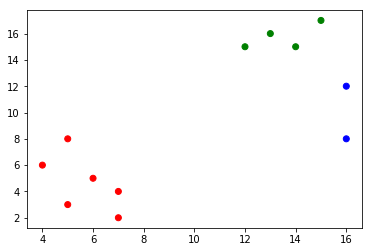

In [4]:
import numpy as np  
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

#构建训练集
X = np.array([[15, 17], [14,15], [13,16], [12,15], [16,12], [16,8], 
              [4,6], [5,8], [5,3], [7,4], [7,2], [6,5]])

#方法fit_predict的作用是计算聚类中心，并为输入的数据加上分类标签。
y_pred = KMeans(n_clusters=3).fit_predict(X)
print(y_pred)

plt.figure()
color = ("red", "green","blue")
colors=np.array(color)[y_pred]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.show()

## 例2：Spark MLlib 实现 k-means

The MLlib RDD-based API is now in maintenance mode.

As of Spark 2.0, the RDD-based APIs in the spark.mllib package have entered maintenance mode. The primary Machine Learning API for Spark is now the DataFrame-based API in the **spark.ml** package.

## 例3：使用 kmeans 实现简单的文档聚类

In [6]:
# 引入中文分词包
import jieba
from sklearn.cluster import KMeans

# sklearn文本特征提取——TfidfVectorizer
from sklearn.feature_extraction.text import  TfidfVectorizer

# 构建分词函数
def jieba_tokenize(text):
    return jieba.lcut(text)

# 定义待分类的文档
text_list = ["今天天气真好啊啊啊啊",\
             "苏大强学习了大数据", \
            "我今天想去看一场电影",\
             "我今天看了一场电影",\
             "大数据相关岗位薪资真高啊"]

# 向量化与TF-IDF预处理
tfidf_vectorizer = TfidfVectorizer(tokenizer=jieba_tokenize,lowercase=False)# tokenizer: 指定分词函数
tfidf_matrix = tfidf_vectorizer.fit_transform(text_list)

#使用 kmeans 聚类
km_cluster = KMeans(n_clusters=3)
result = km_cluster.fit_predict(tfidf_matrix)

print(f"聚类结果: {result}" )

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.966 seconds.
Prefix dict has been built succesfully.


聚类结果: [1 2 0 0 2]
